In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E50S200.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E50S1000.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E10S50000.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E40S50000.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E30S200.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E50S50000.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E30S1000.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E40S1000.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E40S200.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E20S200.csv
/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E10S200.csv
/content/dri

**Step 1:**

Follwing above mentioned structure, gen.py should be run with different numbers for:

E: number of exams: 10, 20, 30, 40, 50

P: the probability that each pair of exams will have a student in common: 20, 40, 60, 80, 100

S: number regarding random seed: 200,1000,50000

F: file name will be saved by file suffix "*.in"

The orgiinal gen.py file is available in the following link; however, it i necessary to add some loops to deploy my expriments (scenarios) to achieve several "*.in" automativally. https://drive.google.com/file/d/19VA52sBh7h7dogTj1Msa8y8ITkTKk23L/view?usp=sharing

As it is clear in body of code my experience is combination of changing arguments in nested for loops.

Output of this programs are 75 = 5(counts of exams) * 5(counts of propabilities) * 3(counts of seeds) files.

In [ ]:
import random

def file_generator(n,p,f,s): # Convert original gen.py to a function in order to run it in a loop
    ''' n: number of exams
        p: probability
        f: file name
        this body is especially designed to feed code1 and code2 application
        '''
    random.seed(s)
    # Generating file
    file_in = open(f,"w")
    M = []
    m = 0
    for i in range(1,n):
        for j in range(i+1,n+1):
            if random.random() < p:
                m = m + 1
                M.append([i,j])
    file_in.write(str(n) + " " + str(m) + "\n")
    for i in M:
        file_in.write(str(i[0]) + " " + str(i[1]) + "\n")
    file_in.close()

## Deploying the expriments (different scenarios to gen.py (as a function in this code))
seeds = [200,1000,50000] # List of different seeds
for seed in seeds:
    for i in range(10,51,10): # Range of number of exams 10, 20, 30, 40, 50
        for j in range(20,101,20): # Range of different probabilities 20%, 40%, 60%, 80%, 100%
            f = 'E'+str(i)+'P'+str(j)+'S'+str(seed)+'.in' # To have a better tracking of files' names are generated in which includes number of exams, probability and seeds
            j = j/100 # Range of probabilites are integers, however they have to be changed between 0.05 and 0.95
            file_generator(i,j,f,seed) # Calling the function with necessary arguments


**Step 2:**

I should feed up code1.exe and code2.exe by 285 files which are generated in previous codes. Absolutely feeding up the application files in a string in command prompt and collecting the rsults one by one for 285 file is not only a time consumuing task but also high potential to have errors.

Accordingly, it is necessary to develop code to feed up the application and collect results from command prompt.

For example I should run the following string in cmd:

command: code1 1000(seed) 100(CPU time limit) 21E50P20S1000.in (pregenerated file name)

or

C:\code1 31235 250 E50P20S1000.in

I above mentiones line, 31235 is random nimber for running code1/code2, 250 is the maximum time for running the code otherwise the CPU time output will be reported -1, E50P20S1000 is the name of "*.in" files to feed code1/code2

In order to be able to output data analysis and visualization, I decided to put results which are categorized by probabilties in csv files.



In [ ]:

'''
*** Do not Run following code in this notebook ***

This block is developed to run in windows shell, it includes some system commands.
I can not run the code in this notebook, so I put the results in '/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/'
'''

permission = False

if permission == True:
    import subprocess
    import pandas as pd

    def out_code(file_name,seed): # Function to run scripts in shell/cmd
        syn = str('code1 '+str(seed)+' 250 '+file_name+'.in') # Defining syntax to run

        p = subprocess.Popen(syn, stdout= subprocess.PIPE, shell=True) #Run the compiled code (commands)
        output,err = p.communicate()# Output of run command
        output = output.decode('ascii') # Change the output type
        output = output.split(' ')
        time_slot = output[0]
        proc_time = output[1]
        out_code_list = [time_slot,proc_time] # Generate a list of returns
        return out_code_list

    seeds = [200,1000,50000] # List of different seeds
    for seed in seeds:
        for i in range(10,51,10): # Range of number of exams 10, 20, 30, 40, 50
            df = pd.DataFrame(columns=['Exam_num','Prob_num','Time_slot','Proc_time'])
            for j in range(20,101,20): # Range of different probabilities 20%, 40%, 60%, 80%, 100%
                file_name = 'E'+str(i)+'P'+str(j)+'S'+str(seed) # Generating file names to feed up code1/code2
                ou=out_code(file_name,seed)
                df = df.append({'Exam_num':i,'Prob_num':j,'Time_slot':ou[0],'Proc_time':ou[1]}, ignore_index=True)
            file_name_csv = 'E'+str(i)+'S'+str(seed)+'.csv'
            df.to_csv(file_name_csv)
            print(df)

In [ ]:
'''
In this block one of the results from step 2 can be reached as an example.
'''
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/E50S200.csv')
print(df)

    Unnamed: 0  Exam_num  Prob_num  Time_slot  Proc_time
0            0        50         5         -1    250.001
1            1        50        10          4    111.892
2            2        50        15          4      2.116
3            3        50        20          5      2.093
4            4        50        25          6    138.552
5            5        50        30         -1    250.001
6            6        50        35          7     76.628
7            7        50        40         -1    250.001
8            8        50        45         -1    250.001
9            9        50        50         -1    250.001
10          10        50        55         -1    250.001
11          11        50        60         -1    250.001
12          12        50        65         -1    250.001
13          13        50        70         -1    250.001
14          14        50        75         -1    250.001
15          15        50        80         -1    250.001
16          16        50       

**Exploratory Data Analysis**

**Scatter Plot:**

A scatter plot can be used to examine the relationship between two numerical variables. The performance of both codes in the event of time processing at various probabilities is displayed in the following graphs. To examine the link between the variables, I compute the average of three distinct measurements for each type of seed. Every seed has a distinct point color displayed. Based on the results, we have not taken into account a fixed y axis for better understanding, and it is scalable.

In [ ]:
'''
Importing necessary libraries
'''
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
'''
Defining and setting common parameters
'''
color_list = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan'] # Definition color lists

In [ ]:
def plots_setting_01(cols=5, rows=1, figsize=(16.5, 5.85), font_size=10):
    fig, axs = plt.subplots(ncols=cols, nrows=rows, layout="tight", figsize=figsize, frameon=True) # Setting up subplots
    plt.rcParams.update({'font.size': font_size})
    #plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['figure.dpi'] = 200
    return fig, axs

In [ ]:
def scatter_plot(ax, X, y, y01, y02, y03, x_label, y_label, scatter_title): # Scatter_Plotn function
    # Draw scatter plot in which s related to the size of circles and c related to the color of circles
    ax.scatter(X, y, s=20, c=color_list[0]) # Size of circle= 20 is related to average of results for code1/code2
    ax.plot(X, y,'--')
    ax.scatter(X, y01, s=15, c=color_list[1])# Size of circle= 15 is related to seed=200 of results for code1/code2
    ax.scatter(X, y02, s=10, c=color_list[2])# Size of circle= 10 is related to seed=1000 of results for code1/code2
    ax.scatter(X, y03, s=5, c=color_list[3])# Size of circle= 5 is related to seed=5000 of results for code1/code2
    ax.legend(['Ave Line','Ave', 'S:200','S:1000','S:50000'])
    ax.set_title(scatter_title)
    #ax.set_xlim(0, 110) # It possible to set min and max for X (horizontal) axis
    #ax.set_ylim(-4, 4) # It possible to set min and max for Y (vertical) axis
    #ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [ ]:
def df_scatter_generator():
    df_scatter = pd.DataFrame(columns=['Exam_num','Prob_num','Time_slot','Proc_time']) # Generating dataframe to save calculate average of results for all seeds and plot based on this df
    df_200 = pd.DataFrame(columns=['Exam_num','Prob_num','Time_slot','Proc_time']) # Generating dataframe to save results for seed=200 and plot based on this df
    df_1000 = pd.DataFrame(columns=['Exam_num','Prob_num','Time_slot','Proc_time']) # Generating dataframe to save results for seed=1000 and plot based on this df
    df_50000 = pd.DataFrame(columns=['Exam_num','Prob_num','Time_slot','Proc_time']) # Generating dataframe to save results for seed=5000 and plot based on this df
    return df_scatter, df_200, df_1000, df_50000


In [ ]:
def df_scatter_extraction(y_column, y_label):
    seeds_01 = [200,1000,50000] # List of different seeds
    df_scatter, df_200, df_1000, df_50000 = df_scatter_generator()
    for i in range(10,51,10):
        for s in seeds_01:
            file_name = str('/content/drive/MyDrive/Statistics Experiments Analysis/Kaggle RM Hosam/Code1/'+'E'+str(i)+'S'+str(s)+'.csv') # Generating address to import results for code1
            df_help = pd.read_csv(file_name) # Generating a df as a help df to save temporary read csv file to concat with considered df varied by seed number
            if s == 200: # If condition to extract only data related to seed=200
                df_200 = pd.concat([df_200, df_help], ignore_index=True) # Adding data to pre generated df related to seed=200
            if s == 1000: # If condition to extract only data related to seed=1000
                df_1000 = pd.concat([df_1000, df_help], ignore_index=True) # Adding data to pre generated df related to seed=1000
            if s == 50000: # If condition to extract only data related to seed=5000
                df_50000 = pd.concat([df_50000, df_help], ignore_index=True) # Adding data to pre generated df related to seed=5000
    df_scatter[['Exam_num','Prob_num',y_label]] = df_200[['Exam_num','Prob_num',y_label]] # A datafram is designed for plottinh the results that one of the will be shown by running the code
    df_scatter['200'] = df_200[y_column] # Filling rows related to the column='Time_slot' for seed=200
    df_scatter['1000'] = df_1000[y_column] # Filling rows related to the column='Time_slot' for seed=1000
    df_scatter['50000'] = df_50000[y_column] # Filling rows related to the column='Time_slot' for seed=5000
    df_scatter['Average'] = (df_scatter['200']+df_scatter['1000']+df_scatter['50000'])/3 # Filling rows related to the column='Time_slot' for average of results
    return df_scatter

In [ ]:
def plot_ax(x_label, plot_name, y_label, y_column):
    print('\n\n\n')
    print('===================================================================================================================================================================')
    print('Scatter plots in which {} is fixed, X dimentions are {} and Y dimentions are {}'.format(plot_name, x_label, y_label))
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('\n')
    df_scatter = df_scatter_extraction(y_column, y_label)
    fig, axs = plots_setting_01() # Setting up subplots
    i = 0 # Considered as a counter for exam numbers which defines rows for df that will be plotted
    if plot_name == 'Exam_num':
        i = 0 # Considered as a counter for exam numbers which defines rows for df that will be plotted
    if plot_name == 'Prob_num':
        i = 10 # Considered as a counter for exam numbers which defines rows for df that will be plotted
    for ax in axs:
        i += 10 # exam numbers will be started by 10 for studying fixed exam numbers and by 20 for studying fixed probability number
        X = df_scatter.loc[df_scatter[plot_name] == i,[x_label]] # Defining df as X inputs for scatter plotting
        y = df_scatter.loc[df_scatter[plot_name] == i,['Average']] # Defining df as Y inputs for average scatter plotting
        y01 = df_scatter.loc[df_scatter[plot_name] == i,['200']] # Defining df as Y inputs for seed=200 scatter plotting
        y02 = df_scatter.loc[df_scatter[plot_name] == i,['1000']] # Defining df as Y inputs for seed=1000 scatter plotting
        y03 = df_scatter.loc[df_scatter[plot_name] == i,['50000']] # Defining df as Y inputs for seed=5000 scatter plotting
        scatter_title = plot_name+': '+ str(i)
        scatter_plot(ax, X, y, y01, y02, y03, x_label, y_label, scatter_title) # Calling Scatter Plot function
    plt.show() # I put plt.show here because at the end of this function ax-s are finished and will be restarted





Scatter plots in which Prob_num is fixed, X dimentions are Exam_num and Y dimentions are Time_slot
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




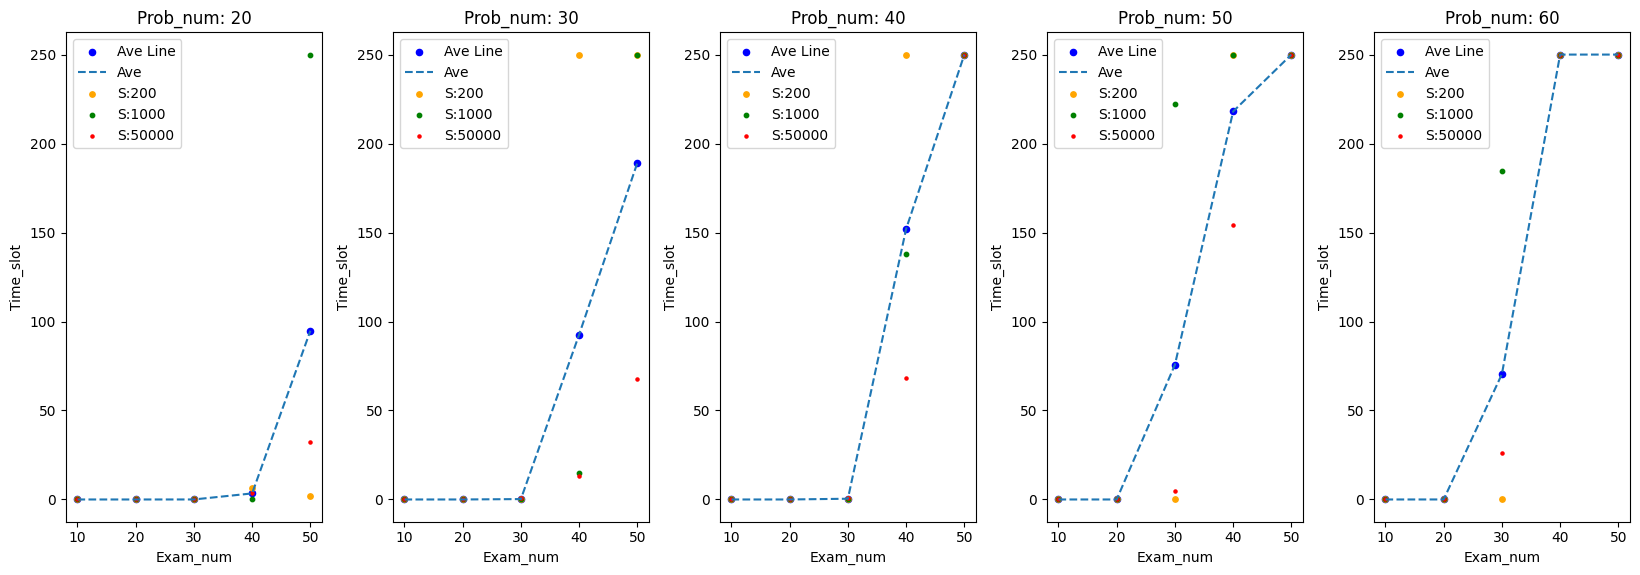





Scatter plots in which Prob_num is fixed, X dimentions are Exam_num and Y dimentions are Proc_time
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




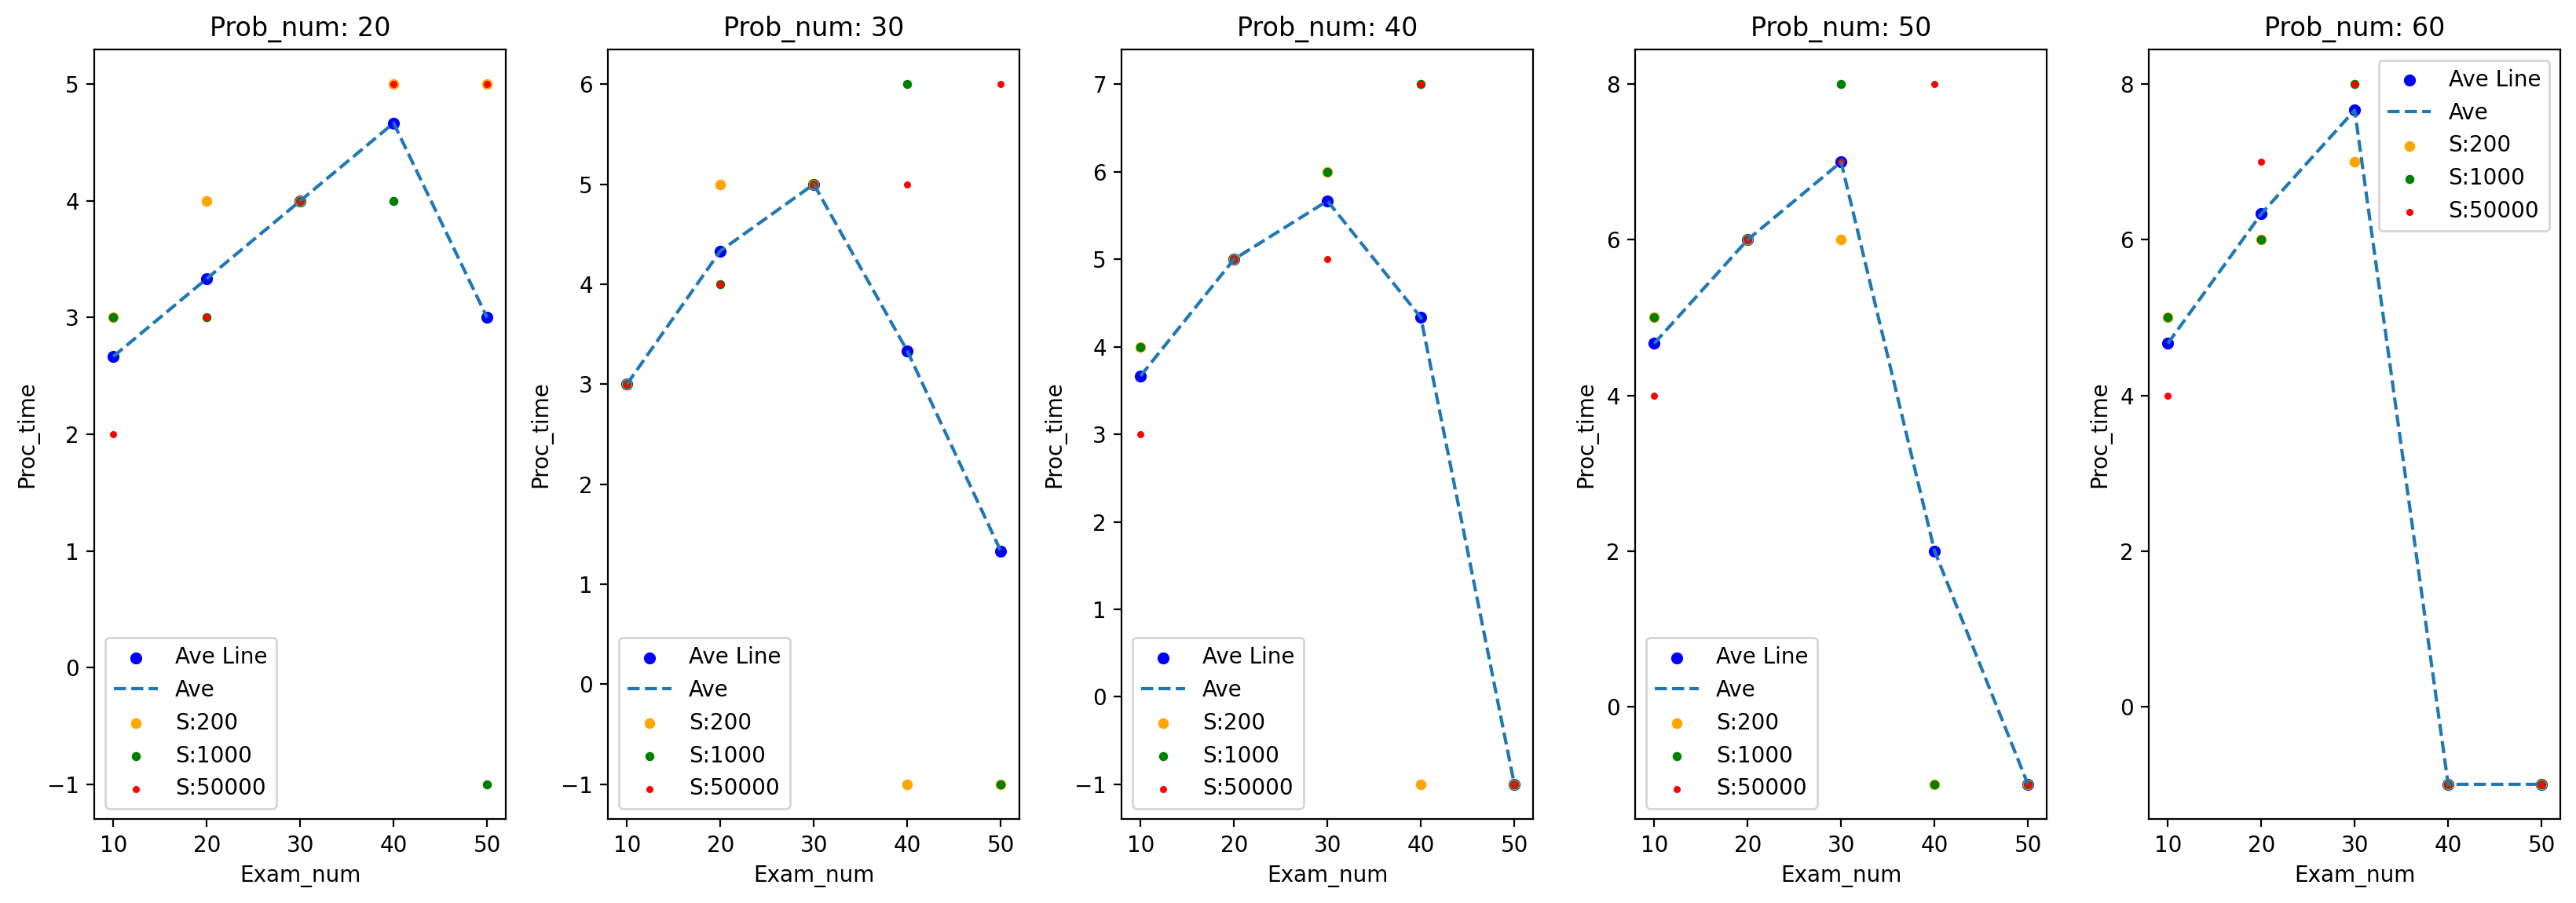





Scatter plots in which Exam_num is fixed, X dimentions are Prob_num and Y dimentions are Time_slot
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




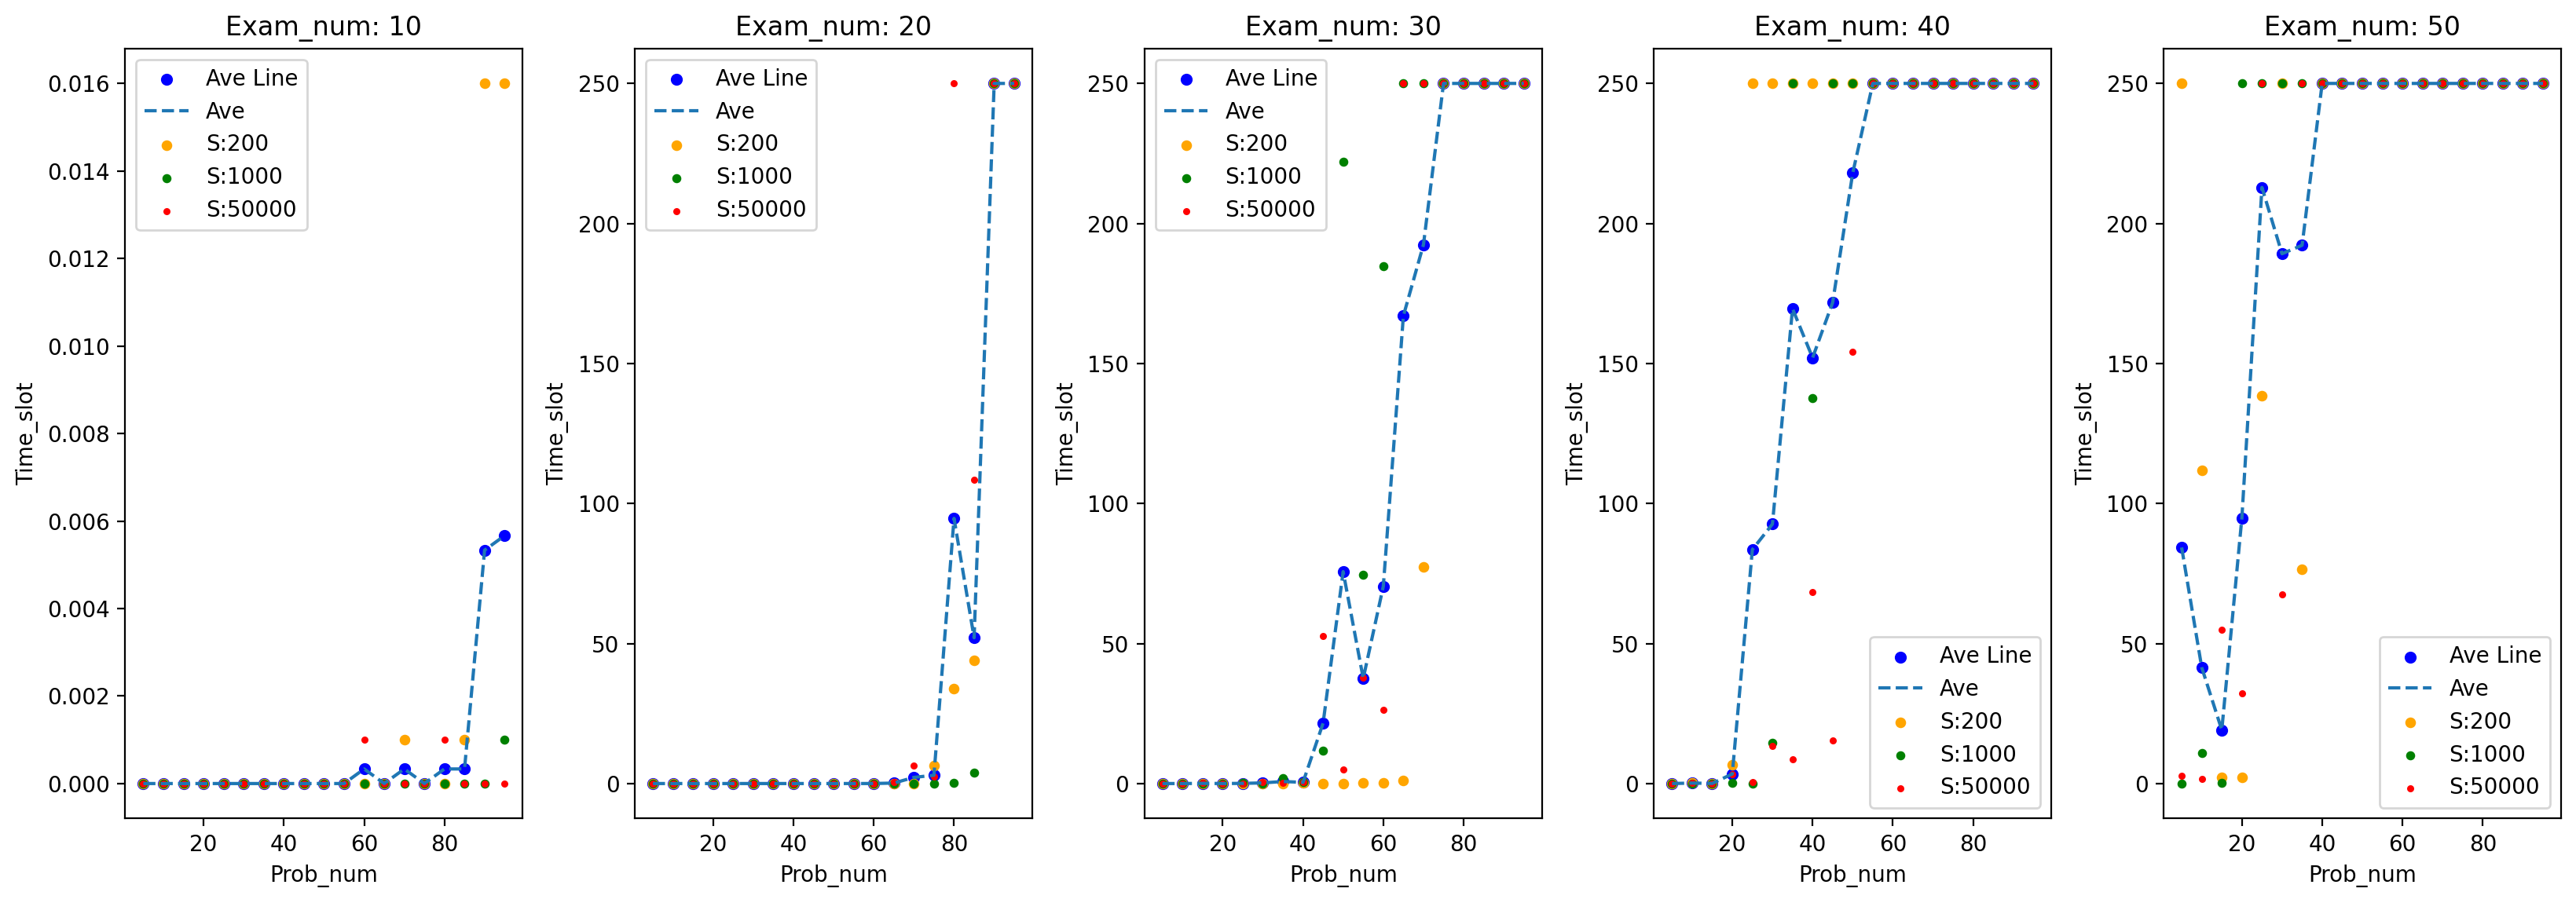





Scatter plots in which Exam_num is fixed, X dimentions are Prob_num and Y dimentions are Proc_time
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




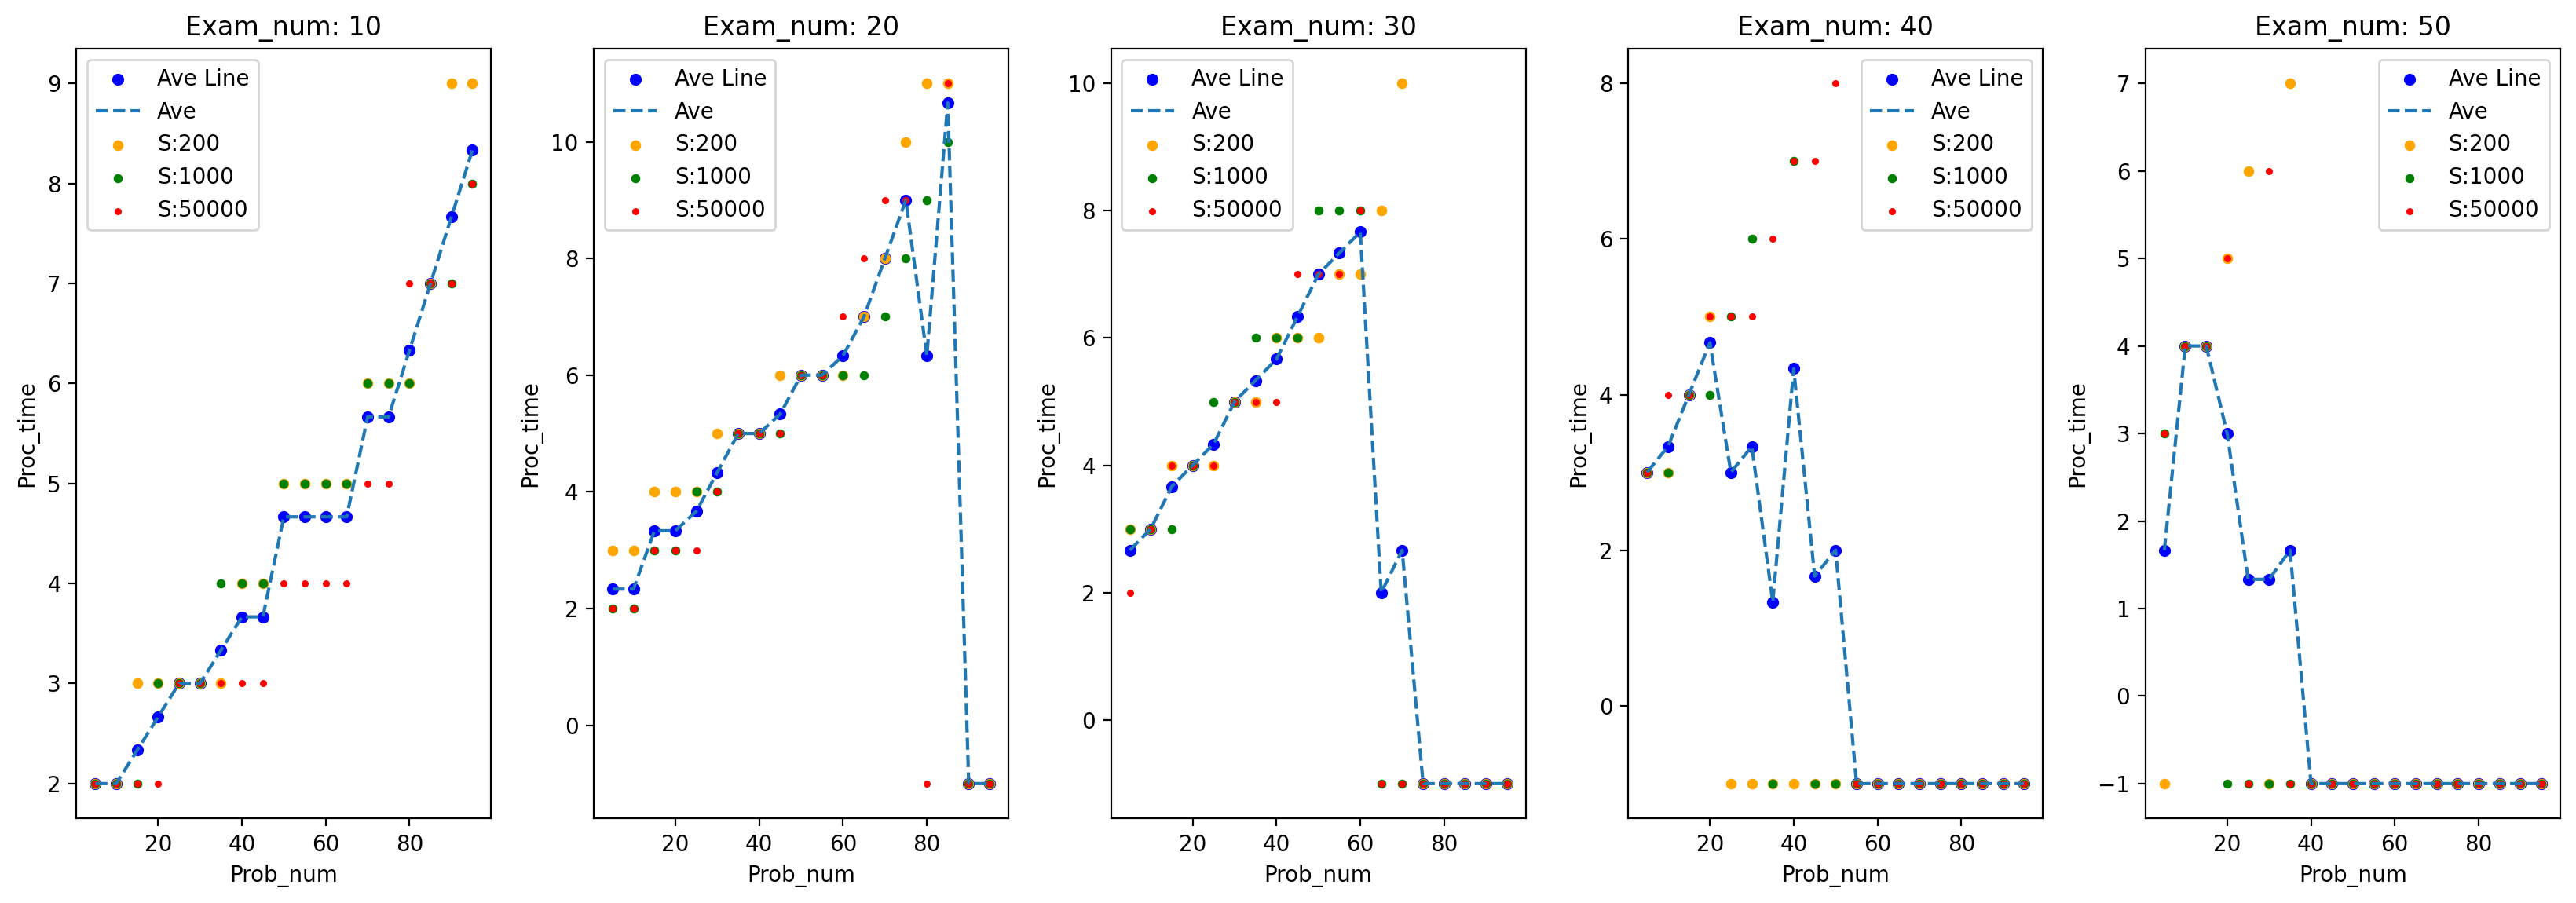

In [ ]:
def main():
    x_labels = ['Exam_num', 'Prob_num'] # X dimention labeling
    y_labels = ['Time_slot', 'Proc_time'] # Y dimention labeling
    for i in range(0,2):
        x_label = x_labels[i]
        plot_name = x_labels[i-1] # Since when one of the x_labels is assumed fix the othe one shoild be considered as x_label
        for i in range(0,2):
            y_label = y_labels[i]
            y_column = y_labels[i-1]# For each above mentioned assumption both independent variables should be considereed seperately
            plot_ax(x_label, plot_name, y_label, y_column)

if __name__ == "__main__":
    main()

**Histogram:**

A variable's set of values' distribution is displayed using a histogram. The distribution of time slots and processing times for various bin sizes based on Codes 1 and 2 are displayed in the following graphs. The number of bins and the size of the bins are inversely correlated. There will be fewer bins to cover the whole data range the larger the bin size. It's worthwhile to take some time to experiment with various bin sizes to see how the distribution appears in each, and then select the chart that best displays the data [2]. We utilized a range of bin sizes, from 2 to 10, because of this.
Because of the lower bound, which is -1 and indicates that the time processing is greater than 250, all of them in Figure 8 are skewed to the right.
Figures 10 and 11 make it easy to see that the distributions of both codes are symmetric, bimodal histograms. Additionally, the majority of distributions fall between 0 and 250, meaning that these comprise the majority of Time Processing outputs.

In [ ]:
'''
Importing necessary documnets
'''
import seaborn as sns # Seaborn library is imported to drow more clear statistics diagrams

In [ ]:
def histogram_plot(ax, X, k, color_hist, hist_title, y_label):
    sns.histplot(X, bins=k, color=color_hist, ax=ax, kde=True)
    ax.set_title(hist_title)
    #ax.set_xlim(0, 110)
    #ax.set_ylim(0, 0.3)
    #ax.grid(True)
    ax.set_xlabel(y_label)
    ax.set_ylabel('Count')

In [ ]:
def hist_ax(x_label, y_label, y_column):
    print('\n\n\n')
    print('===================================================================================================================================================================')
    print('Histogram plots in which {} is shown with different bins'.format(y_label))
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('\n')
    df_histogram = df_scatter_extraction(y_column, y_label)
    fig, axs = plots_setting_01() # Setting up subplots
    i = 0 # Considered as a counter for exam numbers which defines rows for df that will be plotted
    j = 0
    for ax in axs.flat:
        i += 2 # exam numbers will be started by 10 and
        X = df_histogram[['Average', '200', '1000', '50000']]
        hist_title = 'Bins Number: '+ str(i)
        color_hist = color_list[j]
        j += 1
        histogram_plot(ax, X, i,  color_hist, hist_title, y_label)
    plt.show()





Histogram plots in which Time_slot is shown with different bins
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




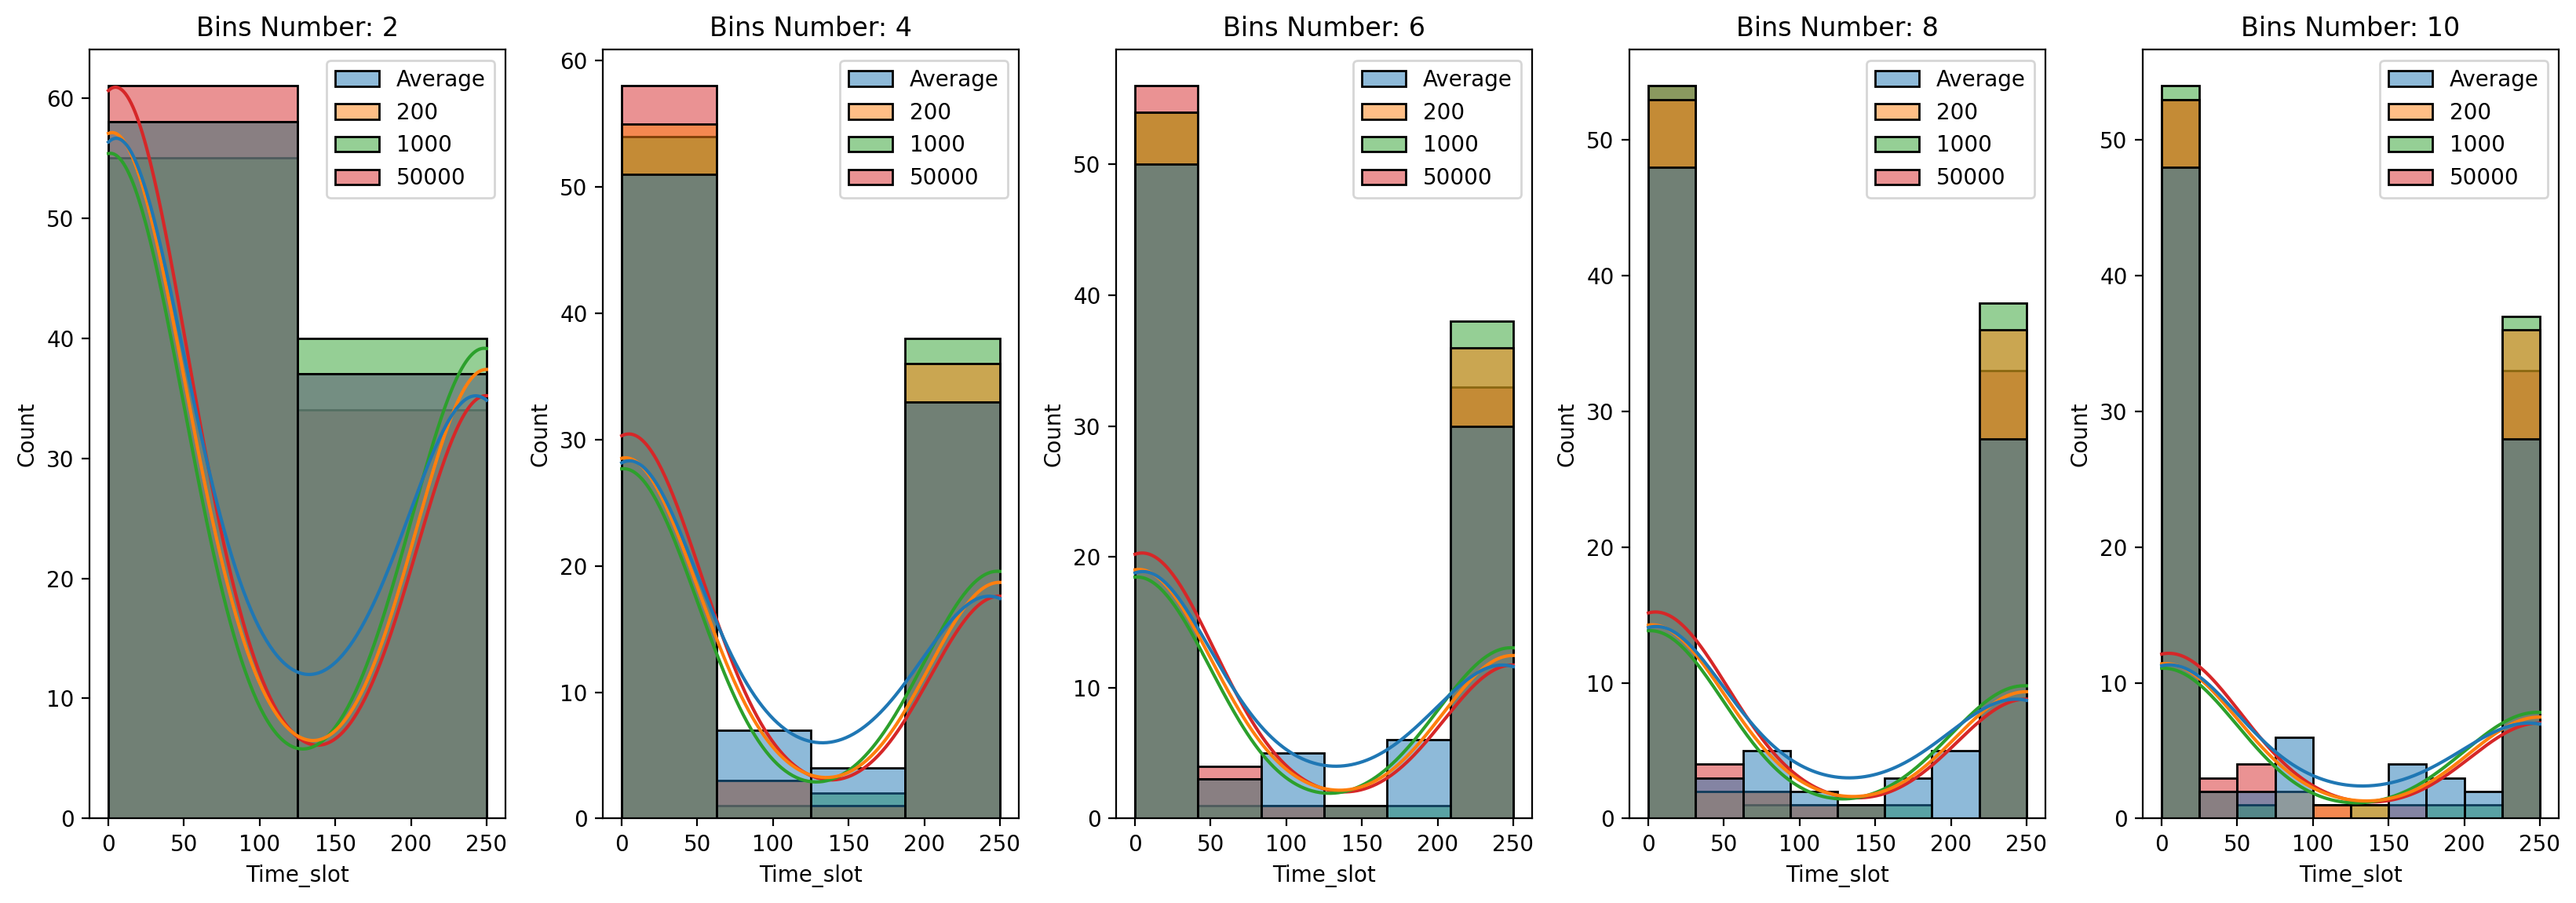





Histogram plots in which Proc_time is shown with different bins
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




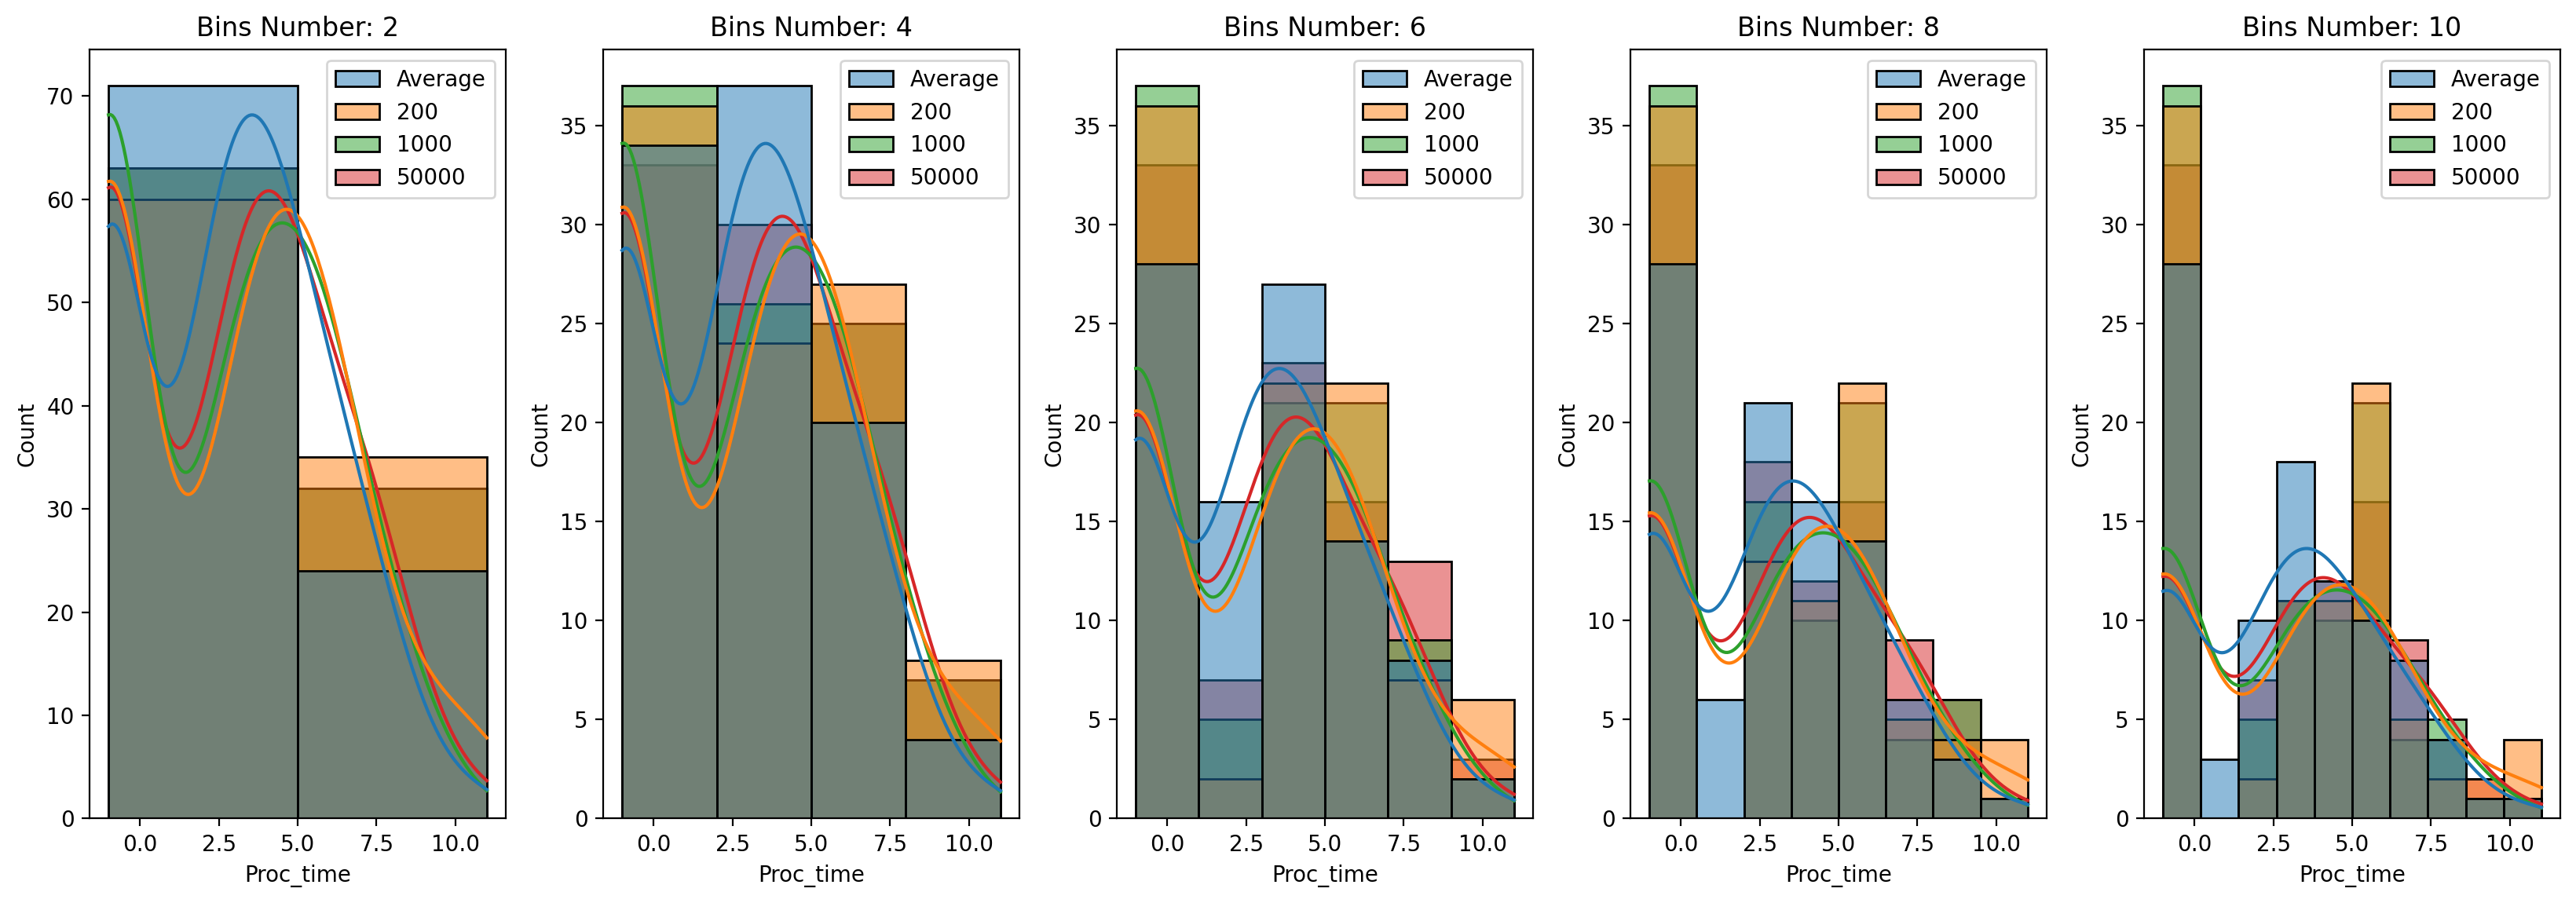

In [ ]:
def main():
    x_labels = ['Exam_num', 'Prob_num'] # X dimention labeling
    y_labels = ['Time_slot', 'Proc_time'] # Y dimention labeling
    for i in range(0,2):
        x_label = x_labels[i] # Main goal of this analysis is studying comparison of results from different seed only for x_labels
        y_label = y_labels[i]
        y_column = y_labels[i-1] # For each above mentioned assumption both independent variables should be considereed seperately
        hist_ax(x_label, y_label, y_column)

if __name__ == "__main__":
    main()

**Polynomial Regression**

As seen in Figures 12 and 13, we employed polynomial regression for the regression, and the outcomes for the two codes are comparable. better degrees are associated with better R2 and lower MSE. Based on our data, we may conclude that our degree 2 regression is more accurate, particularly for smaller exam numbers (10 and 20). Our curve has distorted when there are 40 exams, leading to a repeat of 250, which is the maximum processing time. Degrees more than 2 are disregarded due to their unreliability and overfitting.
The regression results for the two codes for time slots are similar to one another, as shown in Figure 14. With the exception of the scenario involving the ten tests, the relationship between the two variables in both codes is negative. The program released an outlier, or -1, more frequently than expected. As a result, by raising the likelihood of the number of time slots, the outlier was reduced.


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
def poly_regression(ax, X, y, y01, y02, y03, x_label, y_label, scatter_title, k):
    global color_list
    y_pred, scatter_title = poly_title(ax, X, y, scatter_title, k)
    # Plot diagrams
    ax.plot(X, y_pred,'--')
    ax.scatter(X, y, s=4, c=color_list[0]) # Size of circle= 4 is related to average of Y-s of all seeds
    ax.scatter(X, y01, s=3, c=color_list[1]) # Size of circle= 3 is related to seed=200
    ax.scatter(X, y02, s=2, c=color_list[2]) # Size of circle= 2 is related to seed=1000
    ax.scatter(X, y03, s=1, c=color_list[3]) # Size of circle= 1 is related to seed=50000
    ax.set_title(scatter_title)
    #ax.legend(['Reg','Ave','S:200','S:1000','S:50000'])
    #ax.set_xlim(0, 110)
    #ax.set_ylim(-2, 12)
    #ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label) # I have to replace  'Time-Slot' and 'Proc_time' to extract two main categories for y axis

In [ ]:
def poly_title(ax, X, y, scatter_title, k):
    # Create polynominal regression object
    poly_features = PolynomialFeatures(degree=k) # Generating polynomial features
    x_poly = poly_features.fit_transform(X) # Transforming X to an object which is acceptable to train based on Polynomial Regression
    model = LinearRegression() # Applying linear regression on polynomial features
    model.fit(x_poly, y) # Training the model
    model_coefficients = model.coef_ # Getting the coefficients of trained modekl
    model_intercepts = model.intercept_ # Getting the intercepts of trained modekl
    y_pred = model.predict(x_poly) # Generating of model prediction to compare with real data
    coefficients_list = model_coefficients.tolist() # Converting coefficient array to list which is list with len=1 and the only item is alist
    coefficients_list = coefficients_list[0] # Convering previous list to a list with len=number of coefficients
    coefficients_list = [np.round(i,5) for i in coefficients_list] # Rounding the coefficients in the list
    coefficients_list = coefficients_list[1:] # The first item in this method is always 0 so I removed it
    # Get the feature names after polynomial transformation
    x_list = [f'X^{i}' for i in range(1, k+1)] # generating a list of X with different powers to generat the title and show equation of regression
    y_pred = model.predict(x_poly) # Generating of prdeicted Y-s from trained model
    equation = 'y = ' # Generating sting of equation to show in the title of plots
    for i in range(0,len(coefficients_list)):
        equation += str(str(coefficients_list[i]) + str(x_list[i])+'+') # Generating sting of equation to show in the title of plots
    equation += str(np.round(model_intercepts[0],3))
    if k % 2 == 0: # Adjusting the title which is divided to different lines including: general title, R2 and regression equation
        scatter_title = (scatter_title +
        '\n R2:' + str(np.round(r2_score(y, y_pred),4)) +
        '\n ' + equation)
    else: # Putting empty ines between plot title and plot for polts in odd columns to avoid of overlapping titles
        scatter_title = (scatter_title +
        '\n R2:' + str(np.round(r2_score(y, y_pred),4)) +
        '\n ' + equation +
        '\n ')
    return y_pred, scatter_title

In [ ]:
def poly_ax(x_label, plot_name, y_label, y_column):
    print('\n\n\n')
    print('===================================================================================================================================================================')
    print('Polynomial/Linear Regression Exam Number 10-40 and Degree 1-5 in which {} is fixed, X dimentions are {} and Y dimentions are {}'.format(plot_name, x_label, y_label))
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('\n')
    fig, axs = plots_setting_01(cols=4, rows=4, figsize=(16.5, 11.7), font_size=8) # Setting up subplots
    df_poly = df_scatter_extraction(y_column, y_label) # Extracting main df, it is the same for all diagrams
    i = 0 # Conter for degrees of polynomial training in whihc for each row of axes it must be resetted
    k = 0 # Conter of following loop repeatation
    for ax in axs.flat:
        if i%4 == 0: # For example if I want to plot 4*5 diagrams I have to change 4 to 5
            i = 0
        j = (int(k/4)+1) # If I want to plot 4*5 diagrams I have to change 4 to 5
        k += 1
        i += 1
        X = df_poly.loc[df_poly[plot_name] == j*10,[x_label]] # J is multiplied with 10 to generate exam_num/prob_num depends to assuption of fixed variables
        y = df_poly.loc[df_poly[plot_name] == j*10,['Average']]
        y01 = df_poly.loc[df_poly[plot_name] == j*10,['200']]
        y02 = df_poly.loc[df_poly[plot_name] == j*10,['1000']]
        y03 = df_poly.loc[df_poly[plot_name] == j*10,['50000']]
        X = X.to_numpy() # Converting df to a numpy ndarray to feed the training
        X = X.reshape(-1,1)
        scatter_title = str(y_label)+' '+ str(j*10) + ' ; ' + 'Degree: ' + str(i) # Generating 1st linf of plots' title
        poly_regression(ax, X, y, y01, y02, y03, x_label, y_label, scatter_title, i)
    ax.legend(['Reg','Ave','S:200','S:1000','S:50000']) # Putting legend in the last diagram to saving the area of plots
    #saving_address = '/kaggle/working/'+str(x_label)+' '+str(plot_name)+' '+str(y_label)+' '+str(y_column)+'.jpg'
    #plt.savefig(saving_address)
    plt.show()






Polynomial/Linear Regression Exam Number 10-40 and Degree 1-5 in which Prob_num is fixed, X dimentions are Exam_num and Y dimentions are Time_slot
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




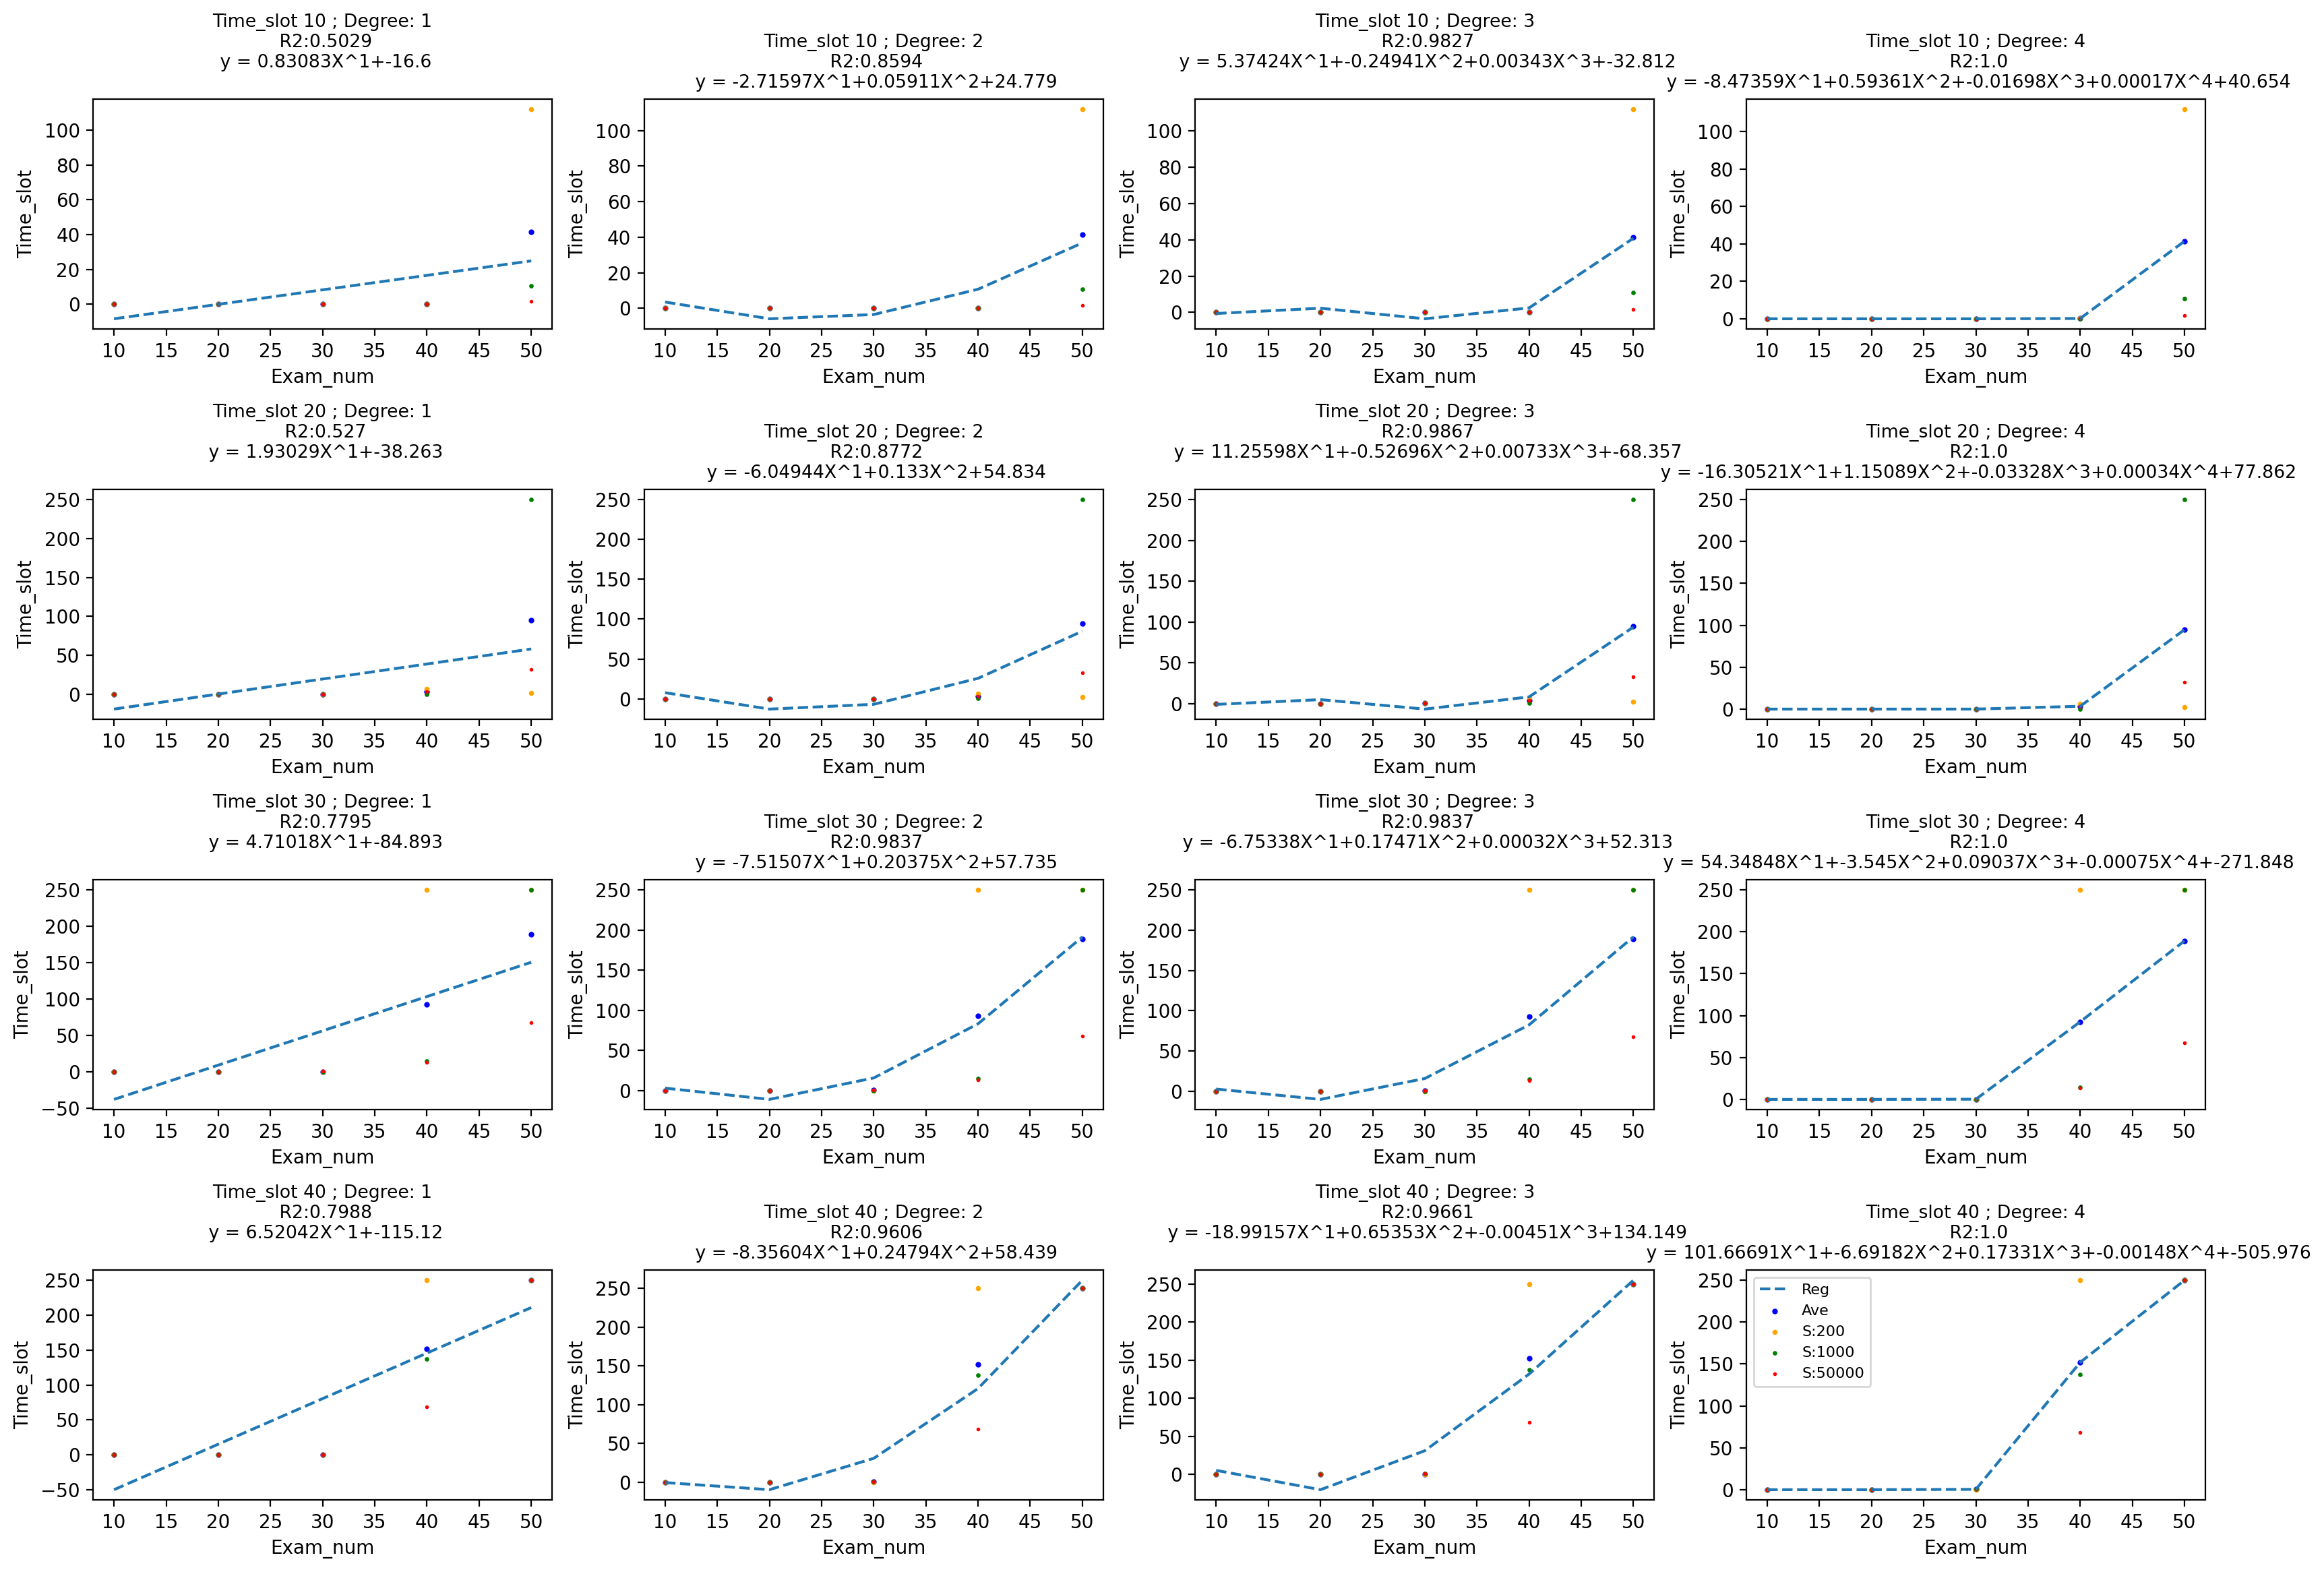





Polynomial/Linear Regression Exam Number 10-40 and Degree 1-5 in which Prob_num is fixed, X dimentions are Exam_num and Y dimentions are Proc_time
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




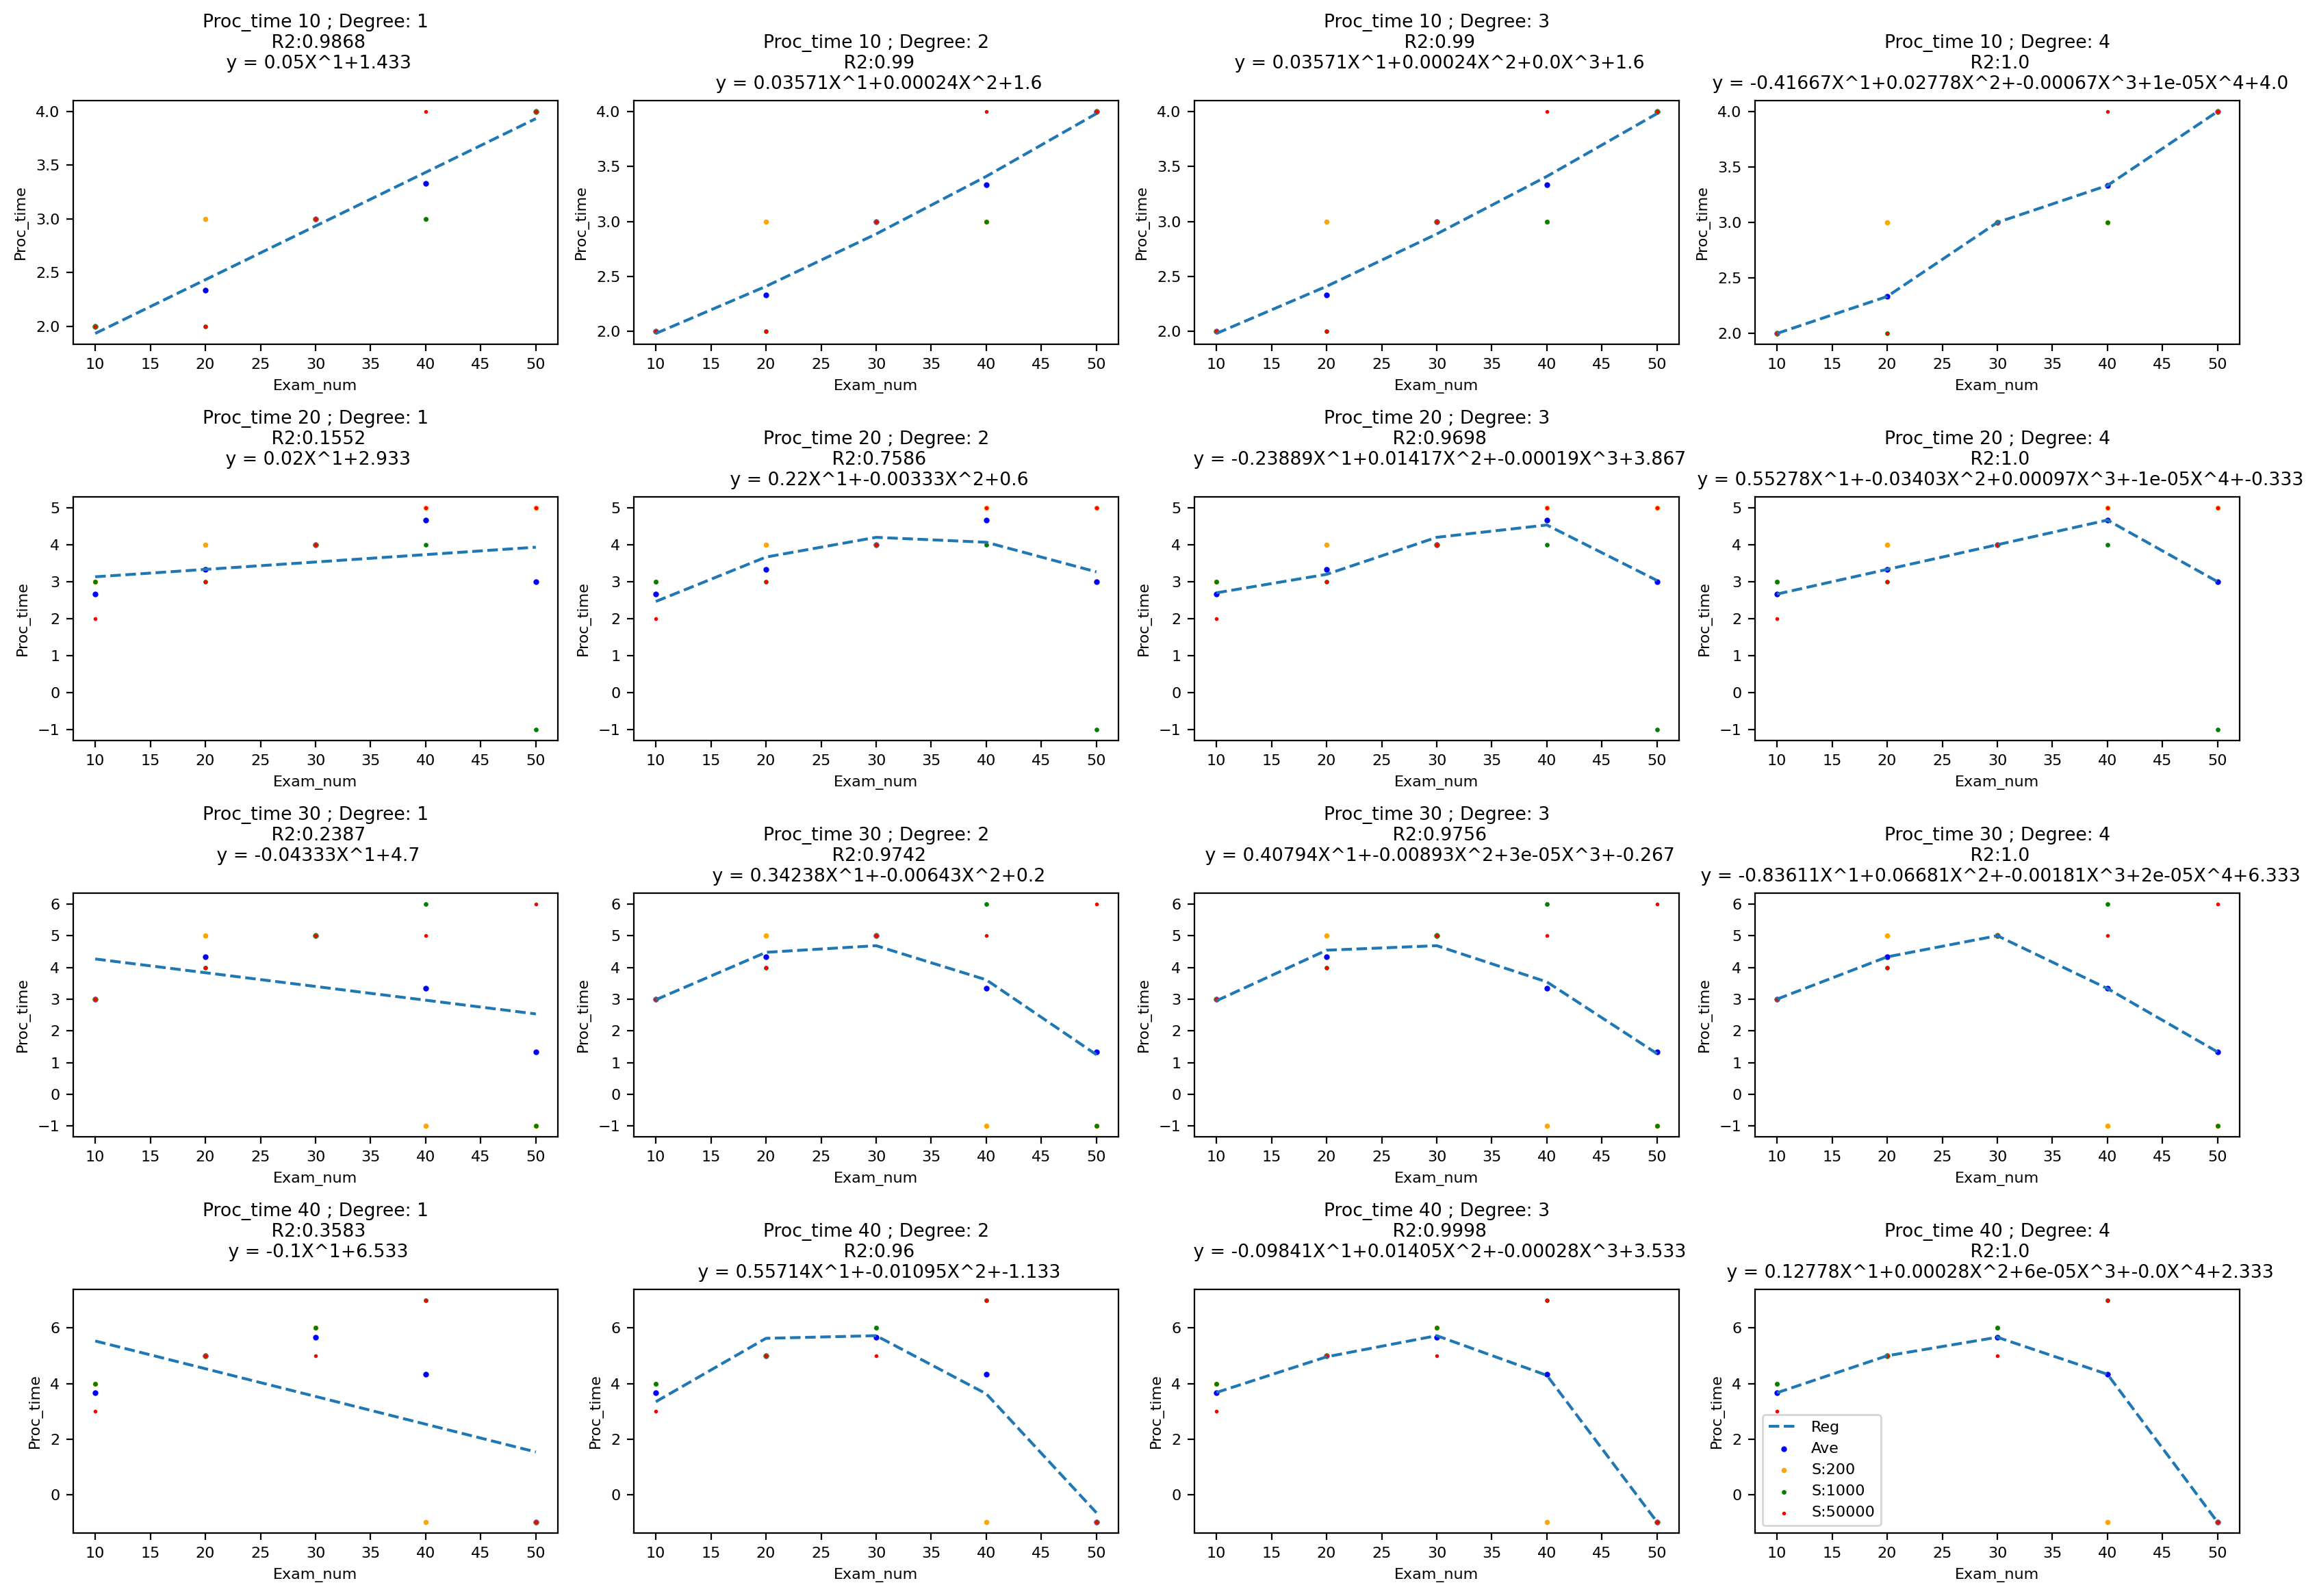





Polynomial/Linear Regression Exam Number 10-40 and Degree 1-5 in which Exam_num is fixed, X dimentions are Prob_num and Y dimentions are Time_slot
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




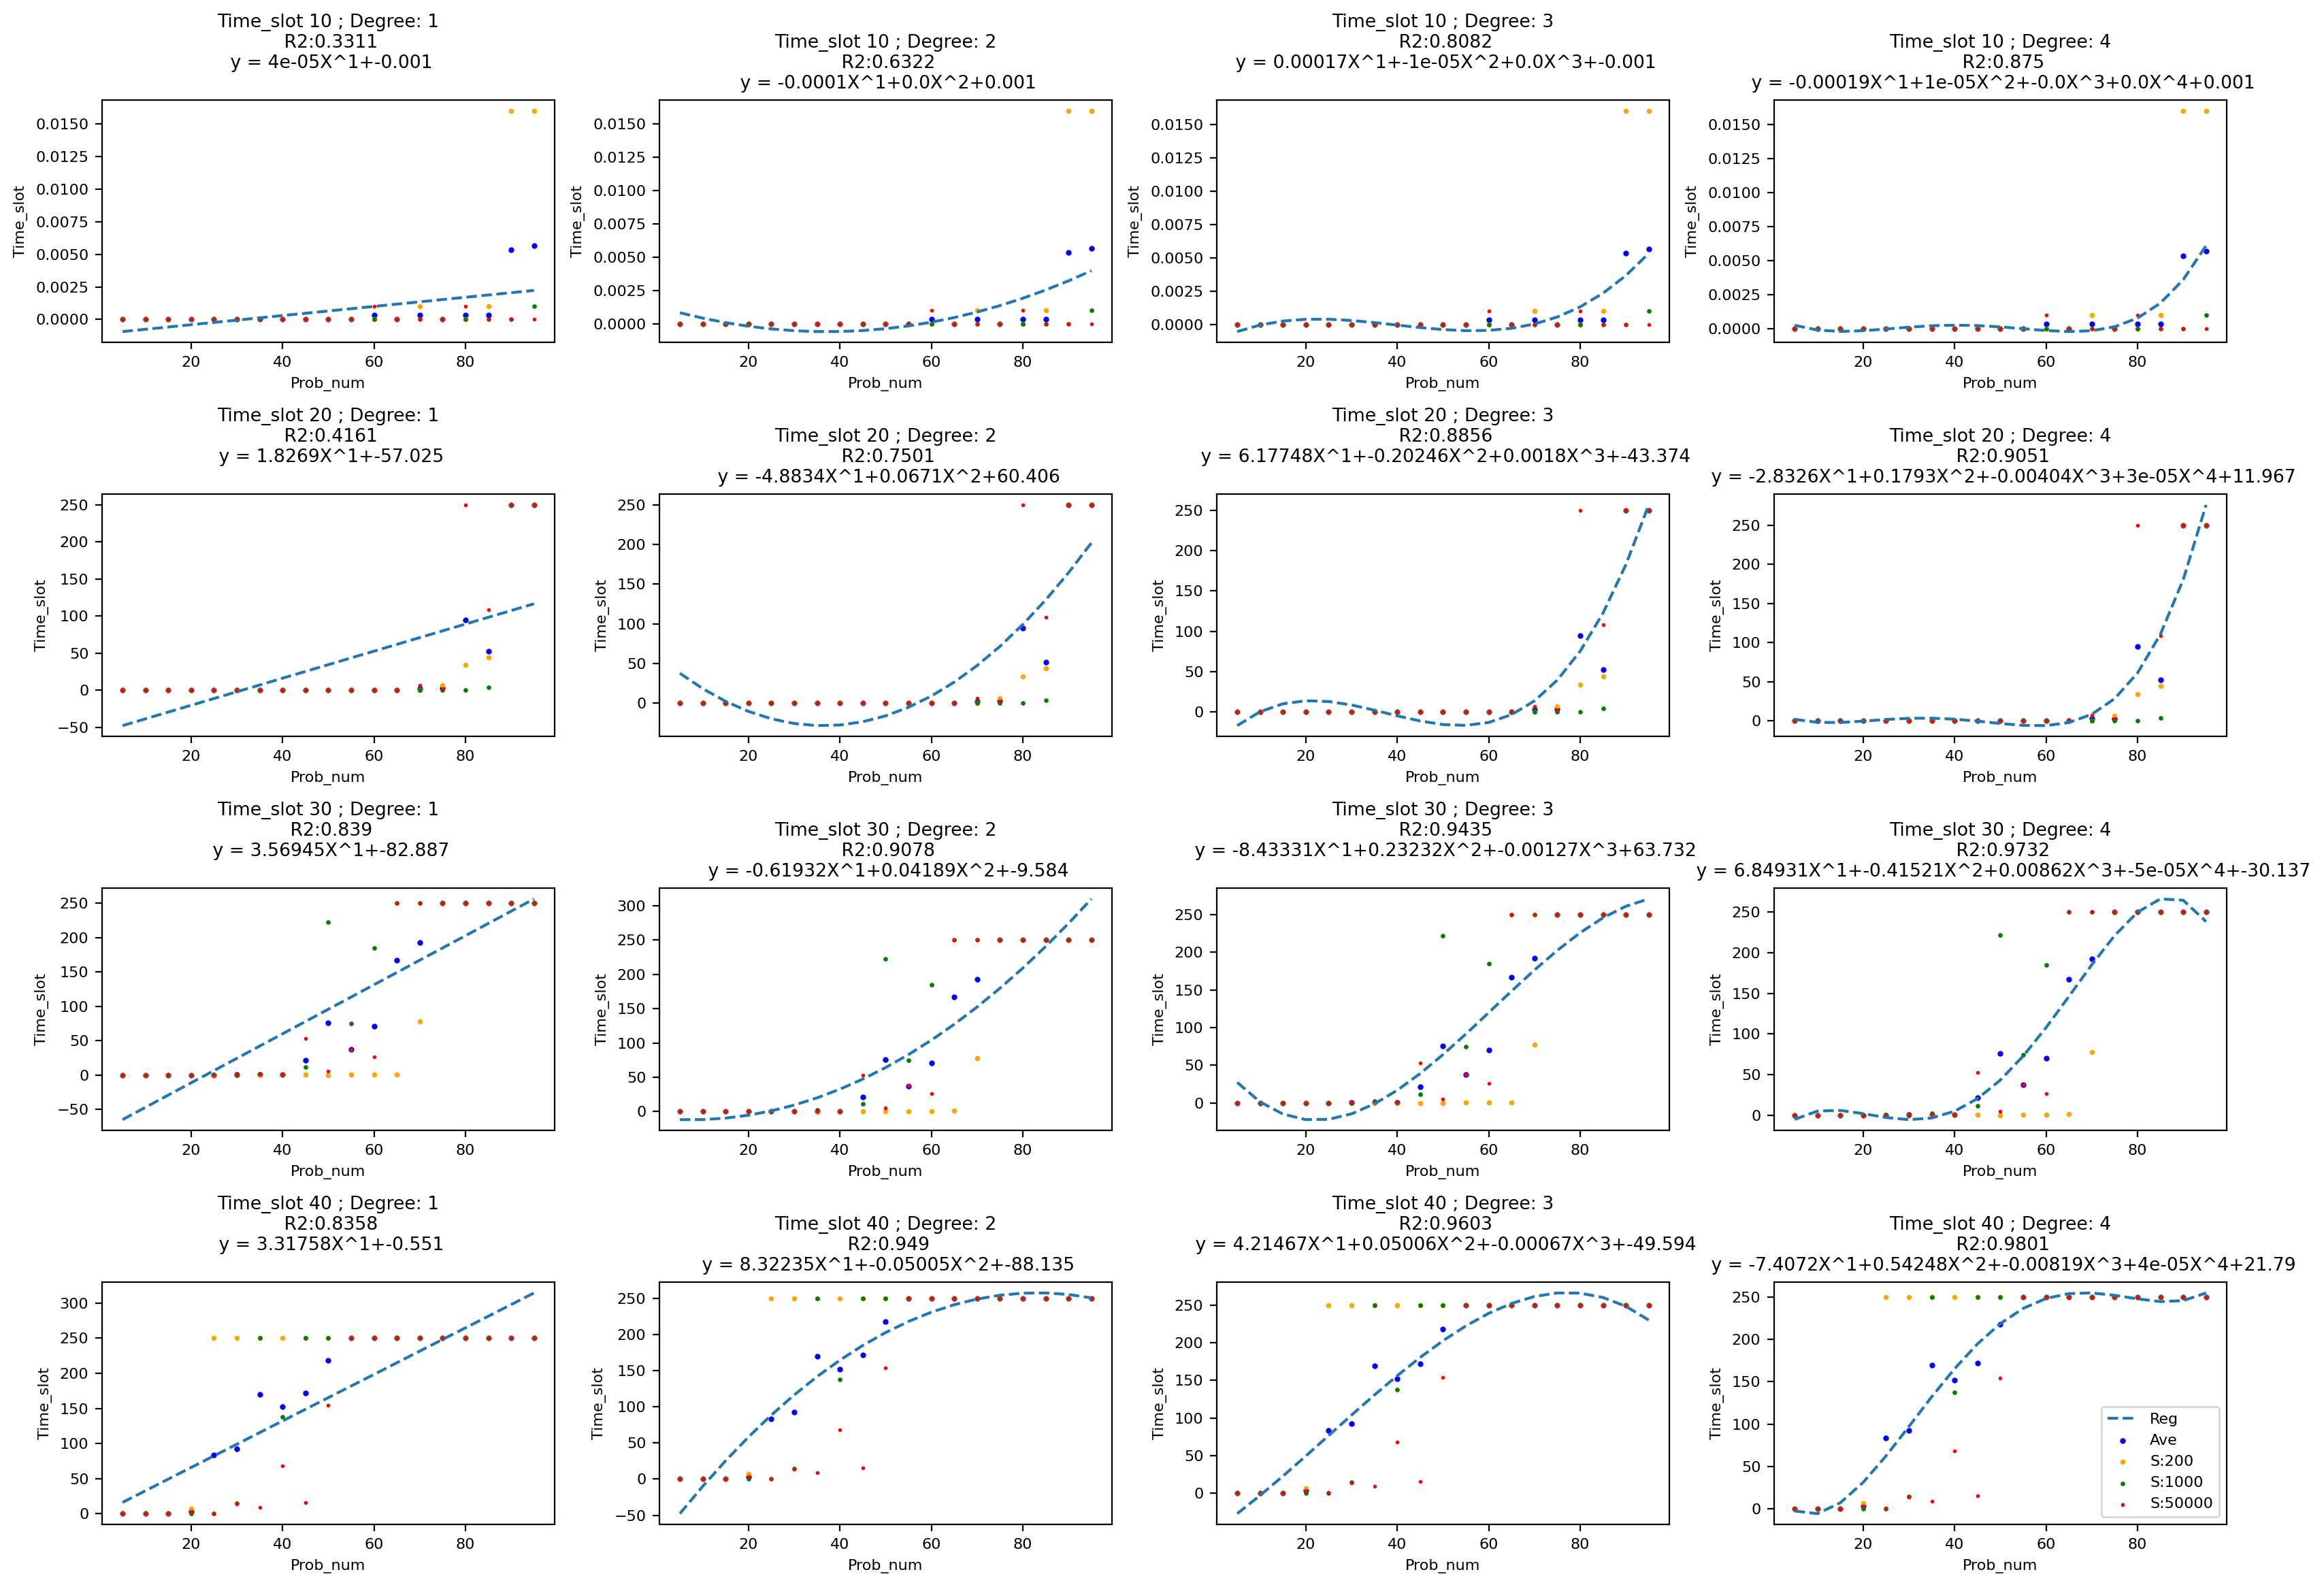





Polynomial/Linear Regression Exam Number 10-40 and Degree 1-5 in which Exam_num is fixed, X dimentions are Prob_num and Y dimentions are Proc_time
-------------------------------------------------------------------------------------------------------------------------------------------------------------------




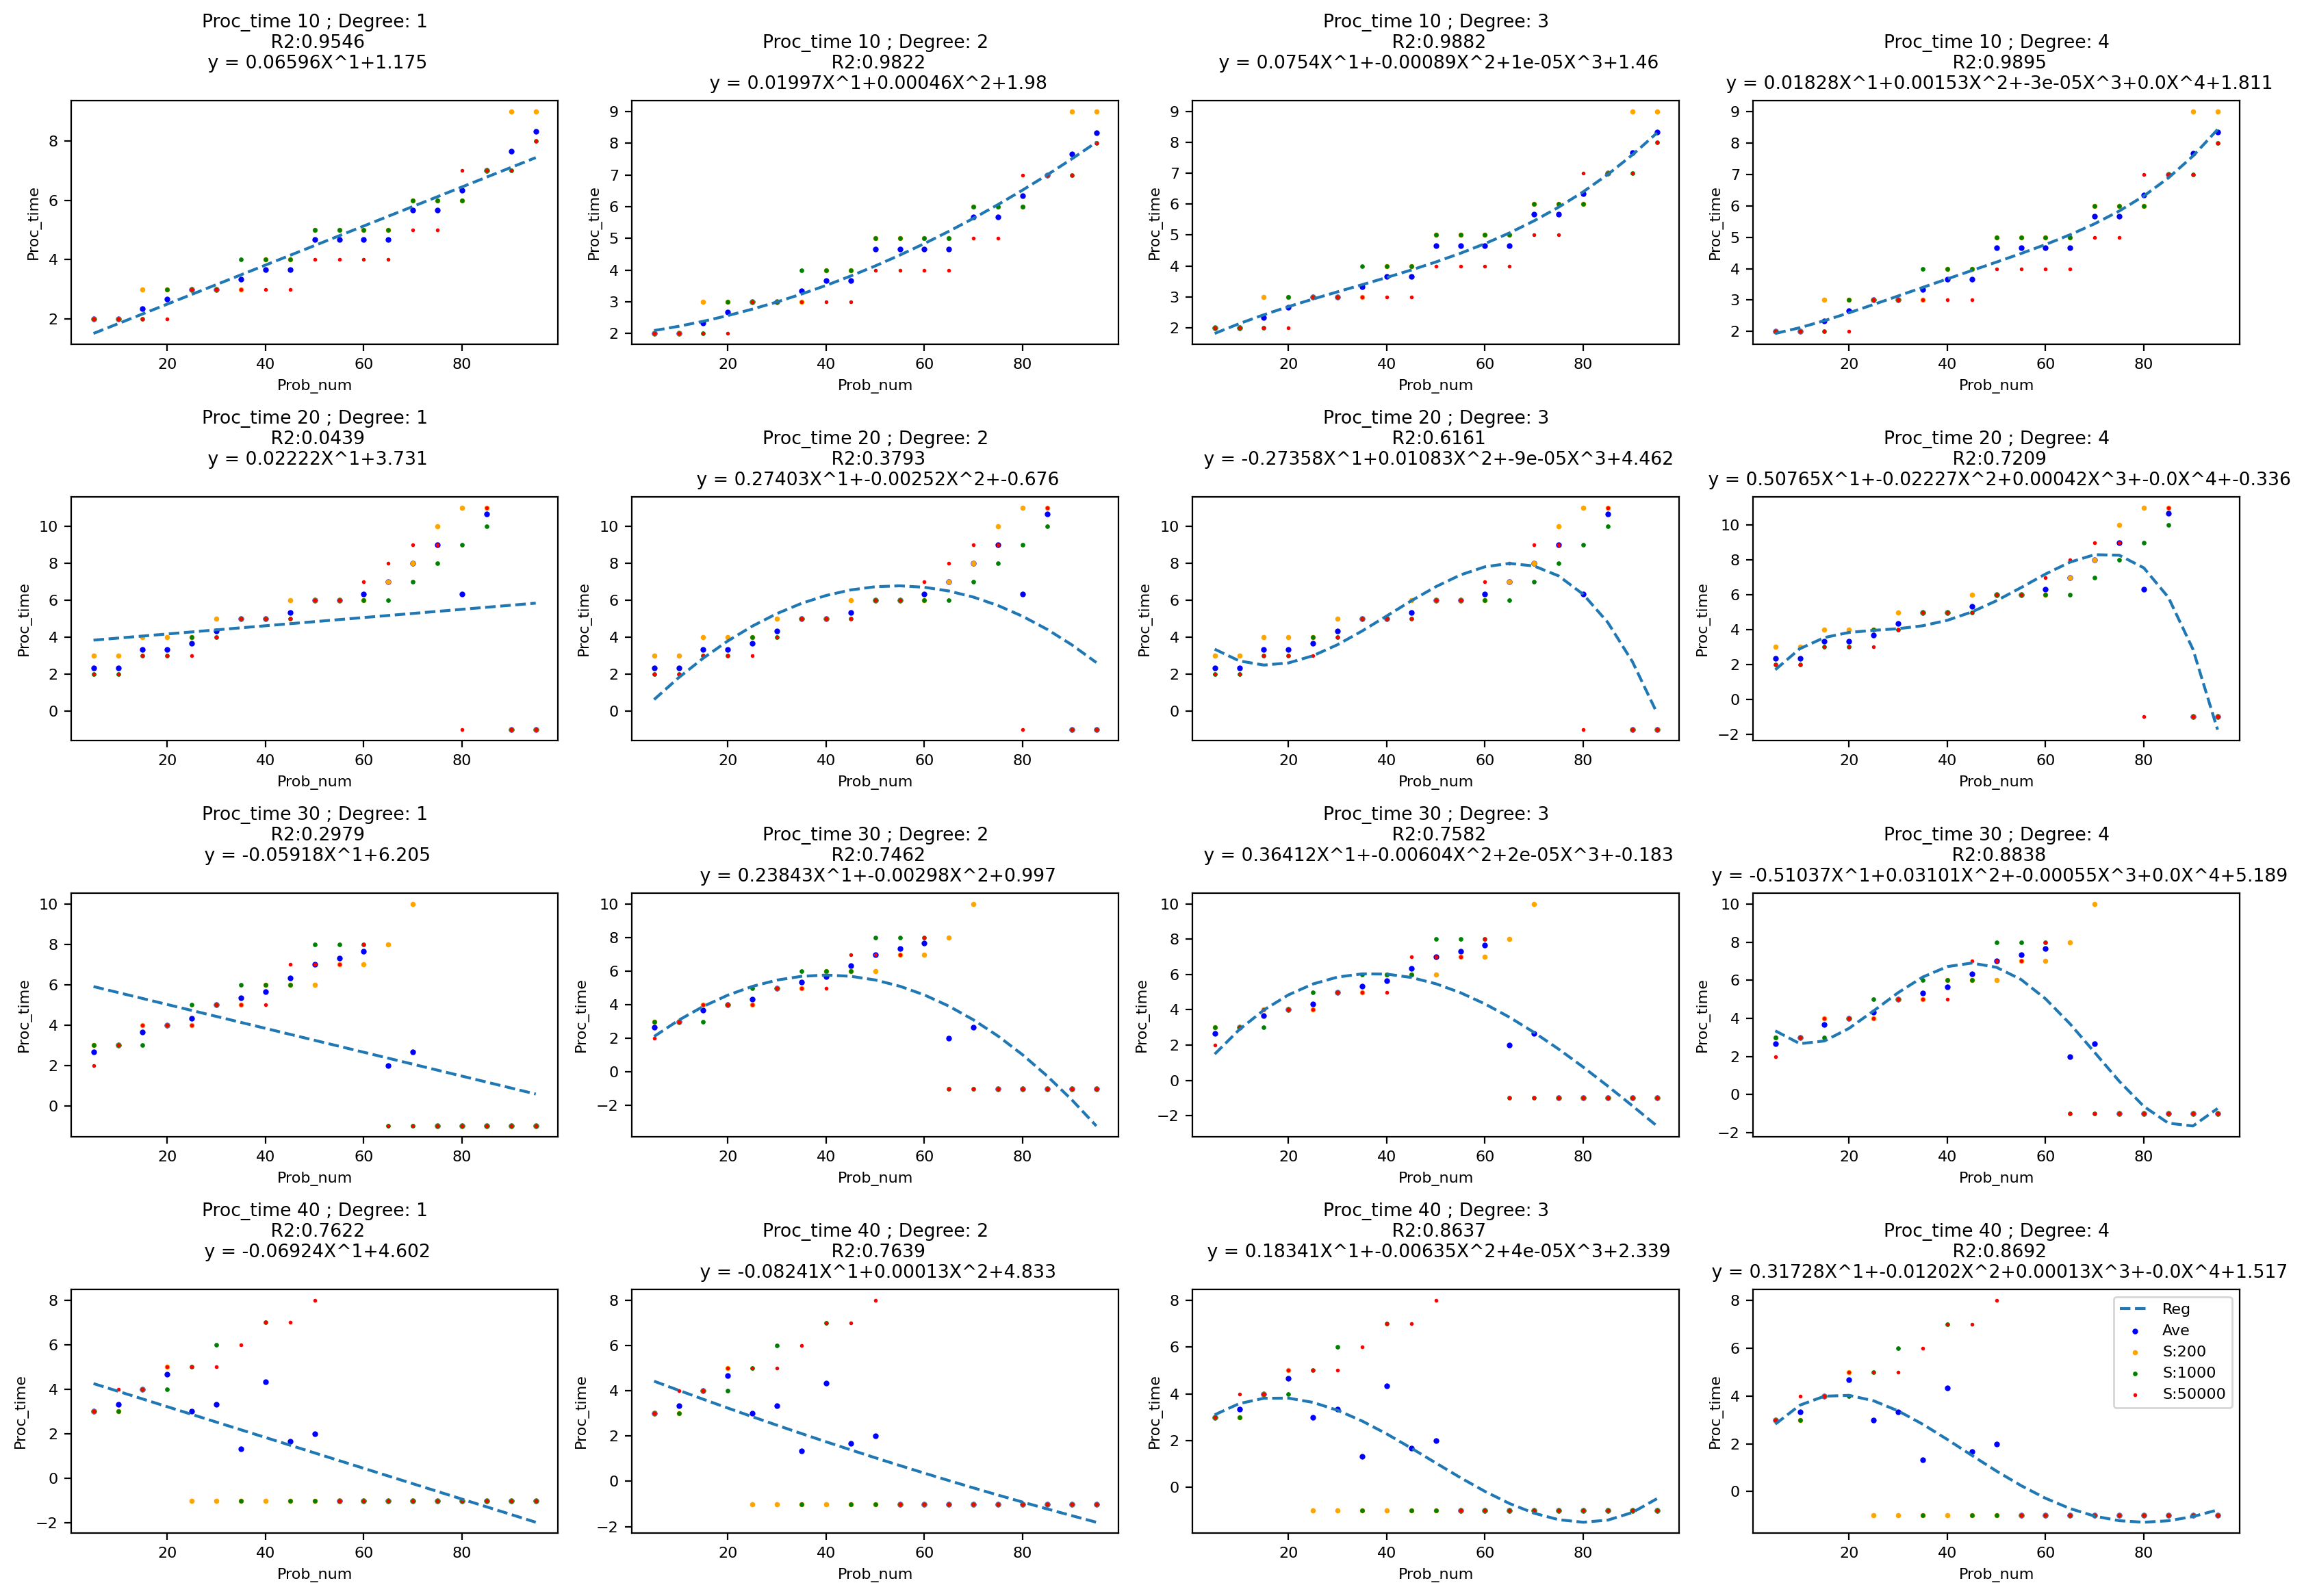

In [ ]:
def main():
    x_labels = ['Exam_num', 'Prob_num'] # X dimention labeling
    y_labels = ['Time_slot', 'Proc_time'] # Y dimention labeling
    for i in range(0,2):
        x_label = x_labels[i]
        plot_name = x_labels[i-1] # Since when one of the x_labels is assumed fix the othe one shoild be considered as x_label
        for i in range(0,2):
            y_label = y_labels[i]
            y_column = y_labels[i-1]# For each above mentioned assumption both independent variables should be considereed seperately
            poly_ax(x_label, plot_name, y_label, y_column)

if __name__ == "__main__":
    main()